## Project 1 - Titanic Data Set

## Read and evaluate the following problem statement:

Determine which passengers survived the Titanic using all available data.

**1. What is the outcome?**

Answer: Of 2,224 total passengers, only 710 survived while 1,514 died.

**2. What are the predictors/covariates?**

Answer: Covariates/predictors in the Dataset may be gender, age, passenger class.

**3. What timeframe is this date relevant for?**

Answer: Timeframe of April 14-15, 1912.

**4. What is the hypothesis?**

H_o: The probability of survival is the same for all those on board.

## Getting started with the Dataset

In [2]:
#pandas
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline

In [3]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("/Users/ianmc213/Downloads/train.csv")
test_df    = pd.read_csv("/Users/ianmc213/Downloads/test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Create data dictionary:**

|   Variable   |   Description   | Type of Variable |
|    :---:     |     :---:       |     :---:        |
| Survived     | 0 = No, 1 = Yes |  Categorical     |
| Fare         |      >= 15      |  Continuous      |


**2. What is the outcome?**

Answer: The possible outcome is that passengers that paid more, were more likely to survive.

**3. What are the predictors/covariates?**

Answer: The predictors/covariates of this analysis is whether passenger class and a paying a higher fare had any impact on survival.

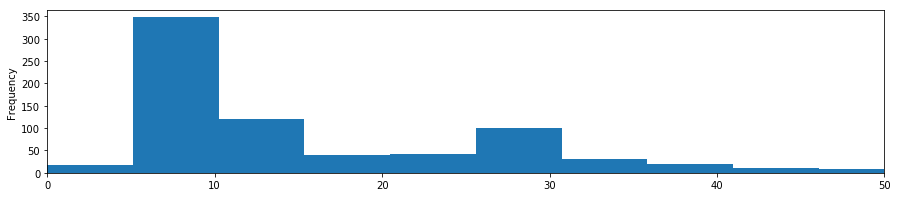

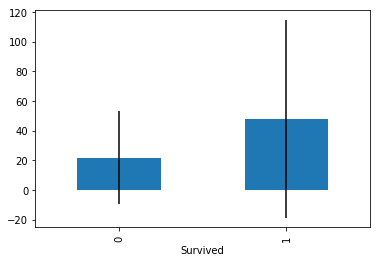

In [4]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

**4. What timeframe is the data relevant for?**

Answer: Timeframe of April 14-15, 1912.

**5. What is the hypothesis?**

H_o: The probability of survival is the same across fare classes.

## Problem Statement

### Exploratory Analysis Plan

**1. What are the goals of the exploratory analysis?**

Answer: The goal is visually summarize the main characteristics of a data set.

**2a. What are the assumptions of the distribution of data?**

Answer: I am assuming that the more a passenger paid, the more likely they were to survive.

**2b. How will the distribution of the data be determined?**

Answer: We will test the data against the normally distributed null hypothesis.

**3a. What outliers impact the analysis?**

Answer: Extreme outliers like very young and very old age my skew results. Children's fares may also skew results.

**3b. How will outliers be tested?**

Answer: Outliers could be removed from the test altogether. The Grubb's Test is one way to identify outliers one by one until no more can be found, assuming a normal distribution.

**4a. What is colinearity?**

Answer: Collinerarity exists when two or more predictor variables are highly correlated, which means that either could be predicted from the others with some degree of accuracy.

**4b. How will colinearity be tested?**

Answer: Collinearity will be tested by Pearson's r to test correlation...along with P-value tests.

**5. What is your exploratory analysis plan?**

Answer: To examine the research question, a Spearman r correlation will be conducted to assess if a relationship exists between variable 1 (Survival) and variable 2 (Fare). Positive coefficients indicate a direct relationship; as one variable increases, the other variable also increases. Negative correlations coefficients indicate an indirect relationship; as one variable increases, the other variable decreases.